C:\Users\user\AppData\Local\Temp\ipykernel_8856\377681117.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  check_appear[keyword] = data_name.str.contains(escaped_keyword).astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_8856\377681117.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  check_appear[keyword] = data_name.str.contains(escaped_keyword).astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_8856\377681117.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

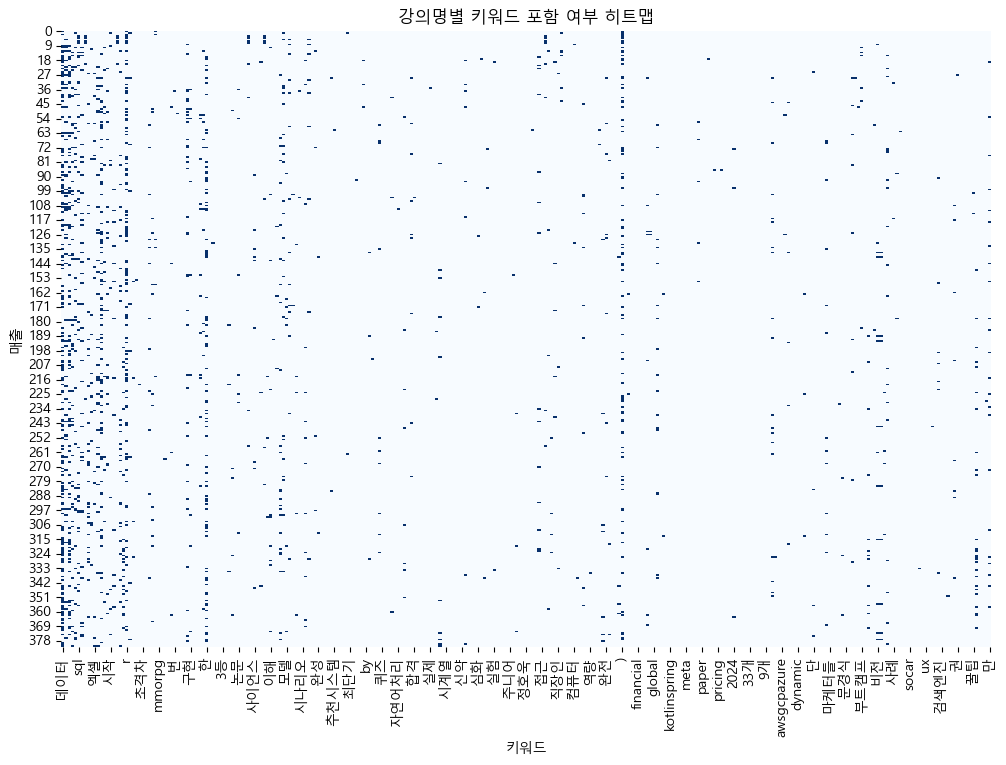

In [16]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일에서 키워드 데이터프레임 불러오기
keyword_raw = pd.read_csv('./추출단어정리.csv')

# 키워드 데이터프레임을 전치
keywords = keyword_raw['word'].T

# 엑셀 파일에서 데이터 불러오기
data = pd.read_csv('./inflearn_crawling.csv')

# 강의명 소문자화
data['강의명'] = data['강의명'].str.lower()

def convert_to_int(x):
    # 숫자만 추출
    num_str = ''.join(filter(str.isdigit, str(x)))
    # 추출된 문자열이 비어 있지 않으면 숫자로 변환, 그렇지 않으면 0 반환
    return int(num_str) if num_str else 0

data['강의 금액'] = data['강의 금액'].apply(convert_to_int)
data['수강생 수'] = data['수강생 수'].apply(convert_to_int)

# 총 매출 계산
data['총 매출'] = data['강의 금액'] * data['수강생 수']
#df_original
# '총 매출' 기준으로 내림차순 정렬
data_sorted = data.sort_values(by='총 매출', ascending=False)

# 인덱스 재설정
data_sorted = data_sorted.reset_index(drop=True)

# 마지막 2개의 행 제외하고 복사
data = data_sorted[:-2]
data_name = data['강의명']

# 단어등장 체크할 데이터 프레임 생성
# 빈 데이터프레임 생성
check_appear = pd.DataFrame()

# 각 키워드에 대해 강의명에 포함되어 있는지 여부를 나타내는 열 추가
for keyword in keywords:
    # 정규 표현식 메타 문자 이스케이프 처리
    escaped_keyword = re.escape(keyword)
    
    # 'check_appear'에 행 추가
    check_appear[keyword] = data_name.str.contains(escaped_keyword).astype(int)
    
plt.rc('font', family='Malgun Gothic')

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(check_appear, cmap='Blues', cbar=False)
plt.title("강의명별 키워드 포함 여부 히트맵")
plt.xlabel("키워드")
plt.ylabel("매출")
# plt.show()
# PDF로 저장
plt.savefig('heatmap(오리지널).pdf', format='pdf', bbox_inches='tight')


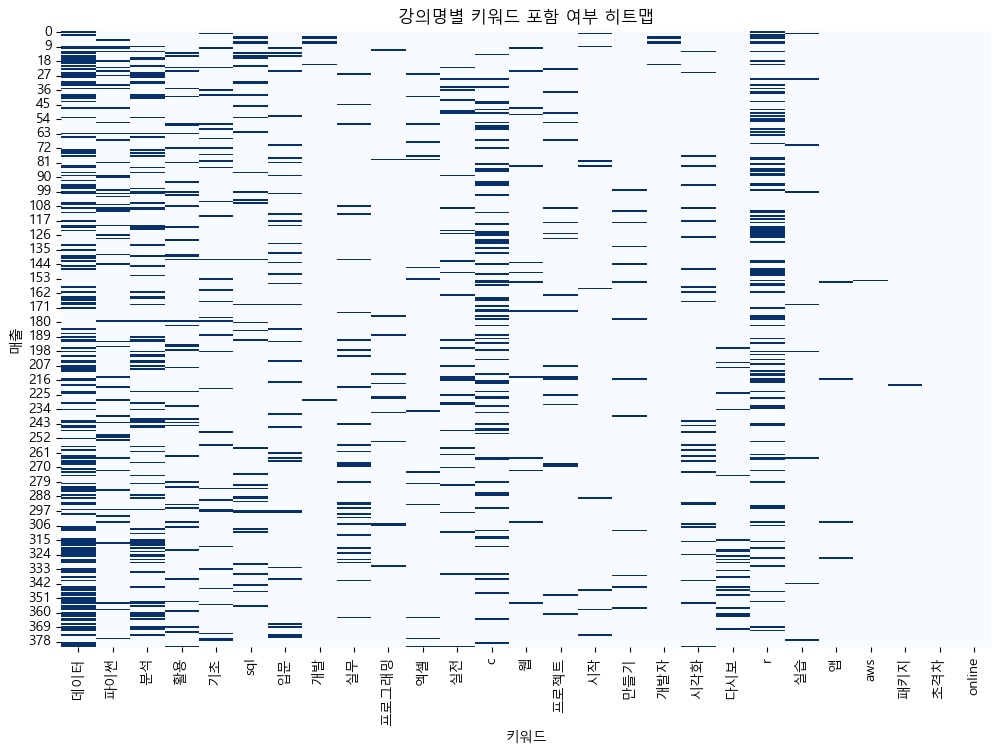

In [17]:
ave = keyword_raw['count'].mean()
mid = keyword_raw['count'].median()
mode = keyword_raw['count'].mode()[0]

keyword_except_1 = keyword_raw[keyword_raw['count'] != 1]
ave = keyword_except_1['count'].mean()
mid = keyword_except_1['count'].median()
mode = keyword_except_1['count'].mode()[0]

# 'count' 열이 1인 행과 'count' 열이 19 미만인 행 삭제
keywords_filtered = keyword_except_1[(keyword_except_1['count'] >= 19)]
keywords_filtered

# 빈 데이터프레임 생성
check_appear_new = pd.DataFrame()

# 각 키워드에 대해 강의명에 포함되어 있는지 여부를 나타내는 열 추가
for keyword in keywords_filtered['word']:
    # 정규 표현식 메타 문자 이스케이프 처리
    escaped_keyword = re.escape(keyword)
    
    # 'check_appear_new'에 행 추가
    check_appear_new[keyword] = data_name.str.contains(escaped_keyword).astype(int)
    
plt.rc('font', family='Malgun Gothic')

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(check_appear_new, cmap='Blues', cbar=False)
plt.title("강의명별 키워드 포함 여부 히트맵")
plt.xlabel("키워드")
plt.ylabel("매출")
#plt.show()

# PDF로 저장
plt.savefig('heatmap(19개 이상 등장 키워드).pdf', format='pdf', bbox_inches='tight')

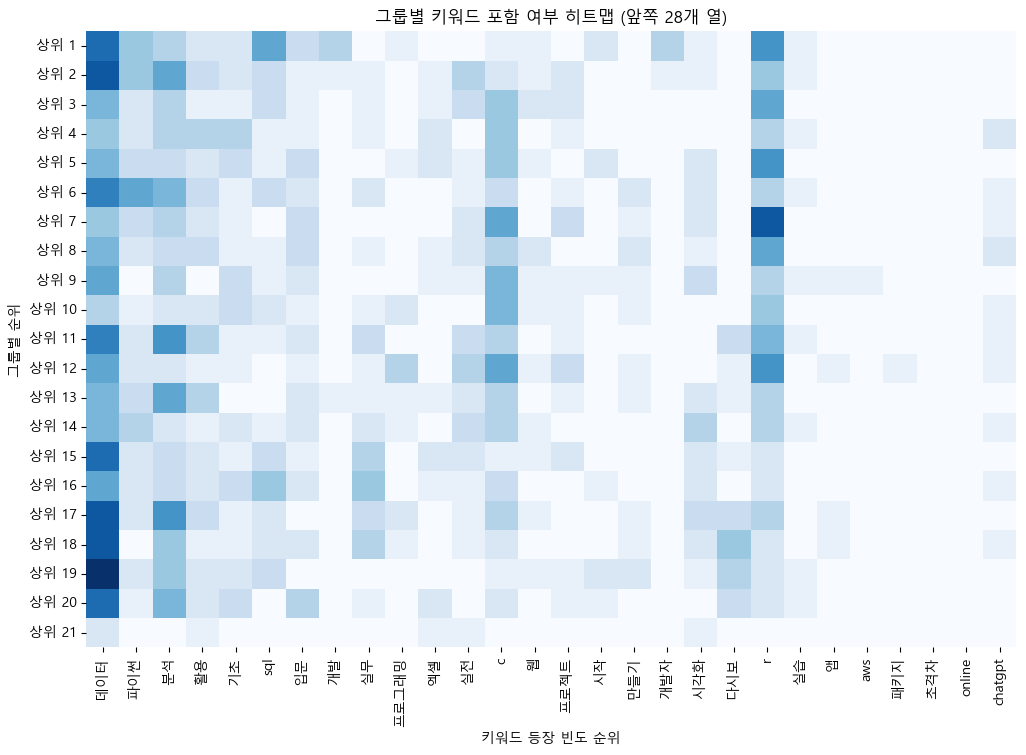

In [18]:
# 그룹화를 위한 전처리
group_size = 19  # 그룹 크기 설정
num_groups = len(check_appear) // group_size

# 데이터프레임을 19개씩 묶어서 리스트로 나누기
check_grouped_data = [check_appear.iloc[i:i+group_size] for i in range(0, len(check_appear), group_size)]

# 각 그룹에서 열에 있는 1의 개수를 더하여 새로운 데이터프레임 생성
check_appear_new = pd.DataFrame()
for i, group in enumerate(check_grouped_data):
    group_sum = group.sum(axis=0)
    check_appear_new[f'상위 {i+1}'] = group_sum

# 데이터프레임 전치
check_appear_new_transposed = check_appear_new.T

# 원하는 열만 선택 (예: 앞쪽 28개 열)
selected_columns = check_appear_new_transposed.iloc[:, :28]

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(selected_columns, cmap='Blues', cbar=False)
plt.title("그룹별 키워드 포함 여부 히트맵 (앞쪽 28개 열)")
plt.xlabel("키워드 등장 빈도 순위")
plt.ylabel("그룹별 순위")
# plt.show()
# PDF로 저장
plt.savefig('heatmap(완성).pdf', format='pdf', bbox_inches='tight')